# Data analysis

In [1]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
IPL=pd.read_csv('Dataset/matches.csv')
IPL.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
IPL.shape

(636, 18)

In [4]:
# Checking IPL Dataset Attributes
IPL.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [5]:
# List of Seasons
IPL['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

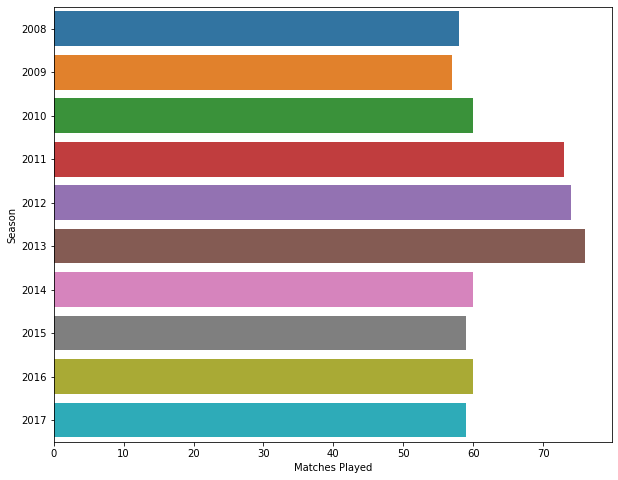

In [6]:
# Season Wise IPL Matches


plt.figure(figsize=(10,8))
data = IPL.groupby(['id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

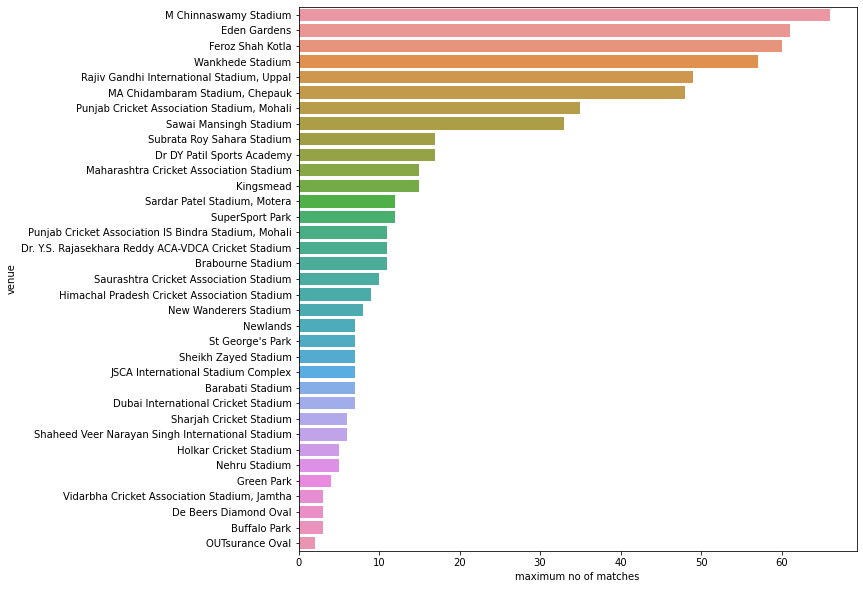

In [7]:
# Most IPL Matches 


plt.figure(figsize=(10,10))
data = IPL['venue'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('maximum no of matches')
plt.ylabel('venue')
plt.show()

(array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 57.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

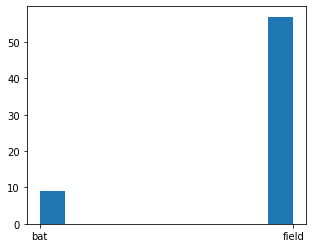

In [8]:
Chinnaswamy=IPL['venue']=='M Chinnaswamy Stadium'
stadium= IPL[Chinnaswamy]
plt.figure(figsize=(5,4))
plt.hist(stadium['toss_decision'])


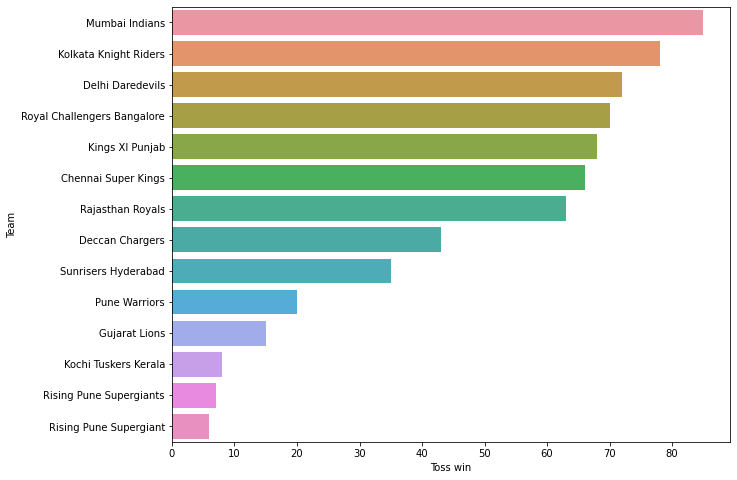

In [9]:
#  IPL most toss won by Team


plt.figure(figsize=(10,8))
data = IPL['toss_winner'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Toss win')
plt.ylabel('Team')
plt.show()

In [10]:
#Getting the frequency of result column
IPL['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

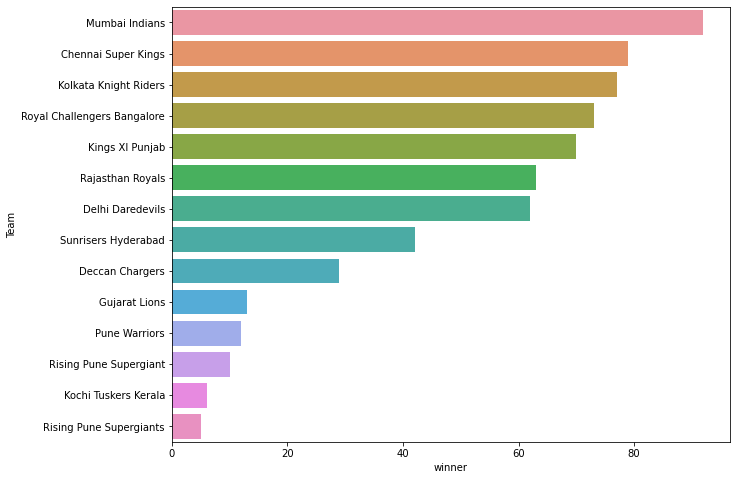

In [11]:
#  IPL Matches win by Each Team
plt.figure(figsize=(10,8))
data = IPL['winner'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('winner')
plt.ylabel('Team')
plt.show()

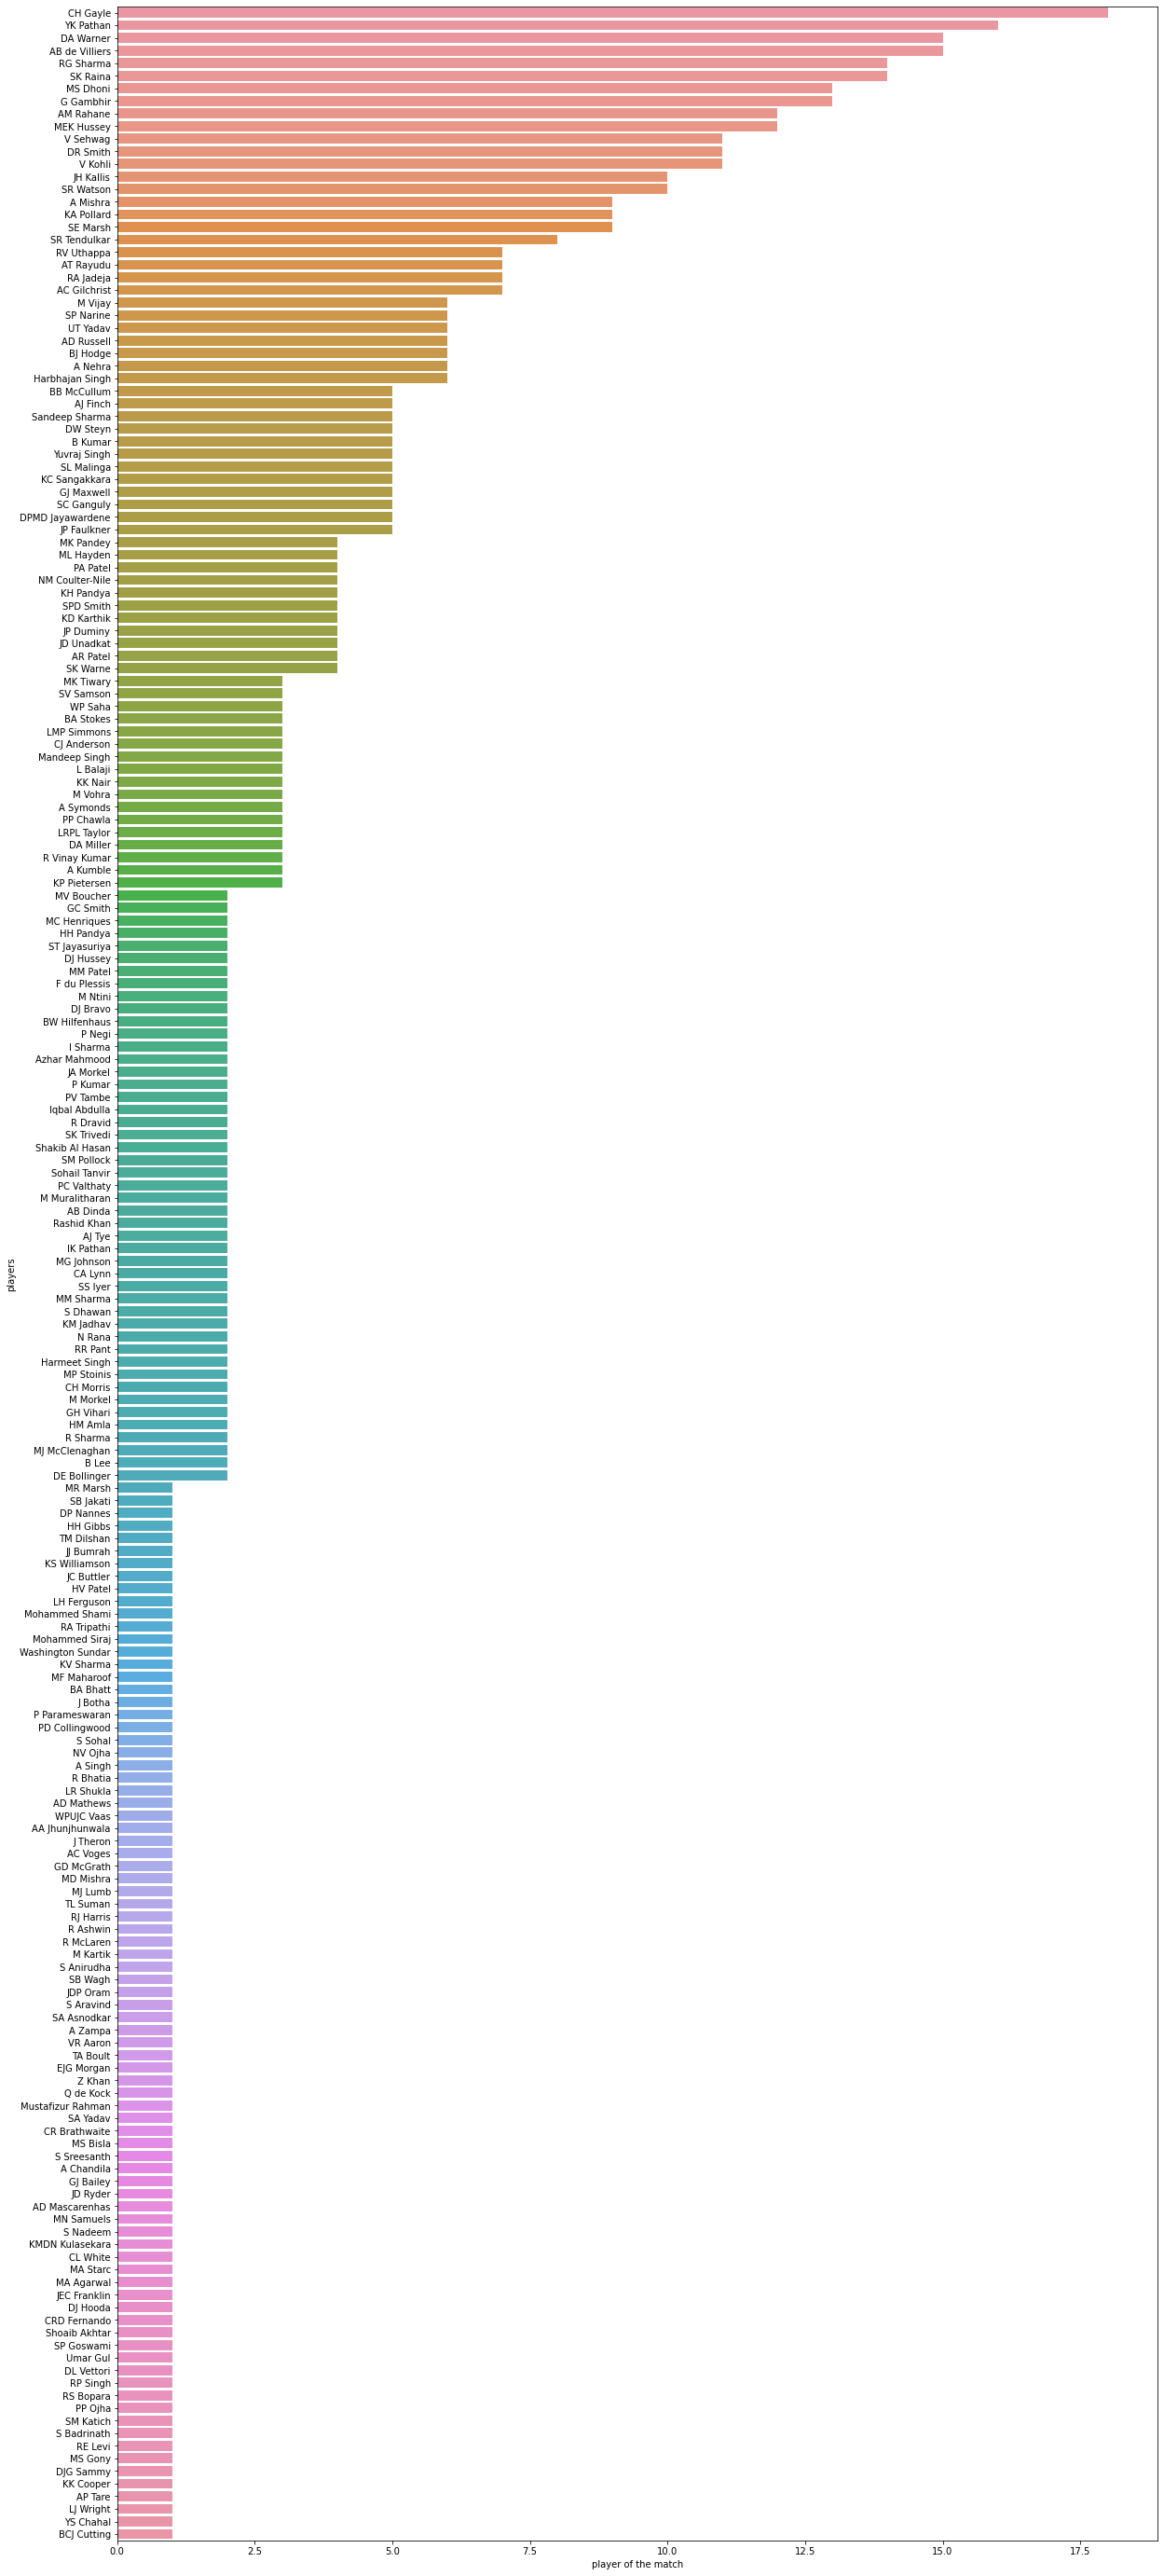

In [12]:
# player who has most player_of_match title

plt.figure(figsize=(20,50))
data = IPL['player_of_match'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('player of the match')
plt.ylabel('players')
plt.show()

In [13]:
# Match Won by most runs
IPL[IPL['win_by_runs']==IPL['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [14]:
# Match Won by most wickets
df =IPL[IPL['win_by_wickets']==IPL['win_by_wickets'].max()]

In [15]:
df['team1'].value_counts()


Gujarat Lions       2
Delhi Daredevils    2
Mumbai Indians      2
Kings XI Punjab     2
Rajasthan Royals    2
Name: team1, dtype: int64

# Machine learning

# First Innings Score Prediction

In [16]:

# Loading the dataset
df = pd.read_csv('Dataset/ipl.csv')

In [17]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [18]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [19]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [20]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [21]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [22]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [23]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [24]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [25]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [26]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [27]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
# encoded_df = pd.get_dummies(drop_first=True,data=df, columns=['bat_team', 'bowl_team'])

In [28]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [29]:
# encoded_df.head()

In [30]:
# encoded_df.columns

In [31]:
# # Rearranging the columns
# encoded_df = encoded_df[['date', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
#               'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
#               'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
#                'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
#               'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
#               'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
#               'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [32]:
# Splitting the data into train and test set
X_train = df.drop(labels='total', axis=1)[df['date'].dt.year <= 2016]
X_test = df.drop(labels='total', axis=1)[df['date'].dt.year >= 2017]

In [33]:
y_train = df[df['date'].dt.year <= 2016]['total'].values
y_test = df[df['date'].dt.year >= 2017]['total'].values

In [34]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [35]:
y_train

array([222, 222, 222, ..., 208, 208, 208])

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
df.drop('total',axis=1)
ohe.fit(df[['bat_team','bowl_team']])


OneHotEncoder(drop='first')

In [37]:
    trans_col = make_column_transformer((OneHotEncoder(drop='first',categories=ohe.categories_),['bat_team','bowl_team']),remainder='passthrough')
    

In [38]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
pipe_line = make_pipeline(trans_col,regressor)
pipe_line.fit(X_train,y_train)
pipe_line.score(X_test,y_test)

0.7522633566350482

In [39]:
test=df.head(1)

In [40]:
test =test.drop(['total'],axis=1)

In [41]:
pipe_line.predict(test)[0]

188.73526536448728

In [42]:
import pickle

# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(pipe_line, open(filename, 'wb'))

In [51]:
 data = pd.DataFrame(np.array(['Kolkata Knight Riders','Royal Challengers Bangalore' ,'80','0','6', '20', '0']),columns=['bat_team','bowl_team','runs','wickets','overs','runs_last_5','wickets_last_5'])

ValueError: Shape of passed values is (7, 1), indices imply (7, 7)

In [43]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
0,Kolkata Knight Riders,Royal Challengers Bangalore,80,0,6,20,0


In [54]:
np.array(['Kolkata Knight Riders','Royal Challengers Bangalore' ,'80','0','6', '20', '0'])

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore', '80', '0',
       '6', '20', '0'], dtype='<U27')